# **Control Systems Engineering Laboratory Using Python	(TDG)**
### **Experiment 1: Simulation of the transient response of linear time invariant systems in Python**

### **Objectives**


1.   To define the transfer function model of a continuous time LTI system
2. To find the unit impulse and the unit step responses of the system		
3. To calculate and compare the step responses of second order continuous time LTI systems (without zeros)
4. To assess the effect of addition of zeros in the time response of a second order continuous time LTI system
5. To simulate the response of a second order continuous time LTI system with arbitrary inputs

## **Initial Setup**

First, install the `control` package in Python.

In [1]:
#!pip install control

## **Details**

Import the `control`, `numpy` and `matplotlib` packages. 

In [2]:
import control as co
import numpy as np
import matplotlib.pyplot as plt

### **Defining transfer functions**

Define a transfer function $G_1(s)=\dfrac{3}{s^2+2s+3}$ with

In [3]:
G1 = co.tf([3], [1, 2, 3])
print(G1)


      3
-------------
s^2 + 2 s + 3



To define a more complicated transfer function, create the Laplace variable ($s$) and proceed from there. For example, this is how you create a transfer function $G_2(s)=\dfrac{18(s+2)(s+6)}{(s+1)(s+5)(s+7)}$.

In [4]:
s = co.tf('s') # the TF variable
G2 = 18*(s + 2)*(s + 6) / ((s + 1)*(s + 5)*(s + 7))
print(G2)


  18 s^2 + 144 s + 216
------------------------
s^3 + 13 s^2 + 47 s + 35



**Exercise 1**

Define the transfer function $G_3 = \dfrac{12(s+4)(s+7)}{s^2+12s+9}$. Write your code in the cell provided below.

In [5]:
# Write your code here

### **Transfer function algebra**

Common arithmatic operations such as addition, subtraction, multiplication and division of transfer functions can be done using basic opeartions. For example, consider two transfer functions $ G = \dfrac{2s + 3}{4s^2 + 5s + 2}$ and $H = \dfrac{5}{s + 1} $. Here are a few operatios on them. 

In [6]:
G = co.tf([2, 3], [4, 5, 2])
H = co.tf([5], [1, 1])
print(G)
print(H)

prod = G * H # cascade
print(prod)

sum = G + H # parallel
print(sum)

sub = G - H # parallel
print(sub)

scale = 5 * G # gain
print(scale)

div = G / H # division
print(div)


    2 s + 3
---------------
4 s^2 + 5 s + 2


  5
-----
s + 1


       10 s + 15
-----------------------
4 s^3 + 9 s^2 + 7 s + 2


  22 s^2 + 30 s + 13
-----------------------
4 s^3 + 9 s^2 + 7 s + 2


  -18 s^2 - 20 s - 7
-----------------------
4 s^3 + 9 s^2 + 7 s + 2


   10 s + 15
---------------
4 s^2 + 5 s + 2


  2 s^2 + 5 s + 3
------------------
20 s^2 + 25 s + 10



Here is the closed loop transfer function when $G$ is the forward path transfer function and $H$ is the feedback transfer function. 

In [7]:
negfeed = co.feedback(G, H)         # negative feedback
print(negfeed)

posfeed = co.feedback(G, H, sign=1) # positive feedback
print(posfeed)


     2 s^2 + 5 s + 3
-------------------------
4 s^3 + 9 s^2 + 17 s + 17


    2 s^2 + 5 s + 3
------------------------
4 s^3 + 9 s^2 - 3 s - 13



### **Poles and zeros**

In [8]:
poles = G.pole() # poles
print(poles)

[-0.625+0.33071891j -0.625-0.33071891j]


In [9]:
zeros = G.zero() # zero
print(zeros)

[-1.5]


**Exercise 2**

If $G = \dfrac{3s^2 + 15s + 39}{65s^3 + 19s^2 + 122s + 120}$ and $H = \dfrac{20(s+2)(s+20)}{7s^2 + 10s + 22}$, find the poles and zeros of the closed loop transfer function $T = \dfrac{G}{1 + GH}$.

In [10]:
# Write your code here

### **Impulse response**

To find the impulse response of $G_1$, 

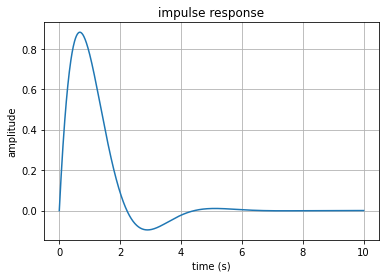

In [11]:
t = np.linspace(0, 10, 1000) # time is taken from 0s to 10s
_, y = co.impulse_response(G1, t) # calculate the impulse response of G1

plt.plot(t, y) # plot the response
plt.xlabel('time (s)') # labels
plt.ylabel('amplitude') # labels
plt.title('impulse response') # title
plt.grid() # grid

**Exercise 3**

Find the impulse response of $G_4 = \dfrac{3(s+1)}{s^2+7s+9}$. Write your code in the cell provided below.

In [12]:
# Write your code here

### **Step response**

To find the step response of $G_1$, 

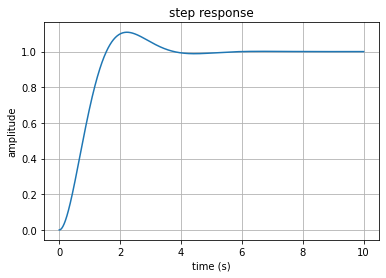

In [13]:
t = np.linspace(0, 10, 1000) # time is taken from 0s to 10s
_, y = co.step_response(G1, t) # calculate the step response of G1

plt.plot(t, y) # plot the response
plt.xlabel('time (s)') # labels
plt.ylabel('amplitude') # labels
plt.title('step response') # title
plt.grid() # grid

**Exercise 4**

Find the step response of $G_5 = \dfrac{3(s+1)(s+7)}{s^2+10s+1}$. Write your code in the cell provided below.

In [14]:
# Write your code here

**Neat example**

Now let us compare the step response of 2nd order systems (without zeros) $G(s)=\dfrac{\omega_n ^2}{s^2+2\zeta\omega_n s + \omega_n ^2}$, for $\omega_n = 1$ (undamped natural freq. = 1 rad/s) and different values of $\zeta$ (the damping ratio).

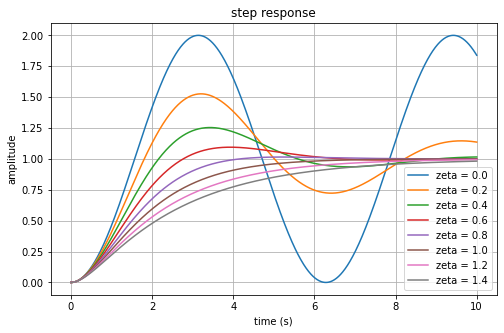

In [15]:
t = np.linspace(0, 10, 1000)                # time is taken from 0s to 10s
plt.figure(figsize=(8, 5))                  # to make a bigger figure

# we are varying zeta from 0.0 to 1.4 in the steps of 0.2
for zeta in np.arange(0, 1.6, 0.2):   
  G = co.tf([1], [1, 2*zeta, 1])            # define the transfer function as G
  _, y = co.step_response(G, t)             # calculate the step response of G
  plt.plot(t, y, label=f'zeta = {zeta:.2}') # plot the response

plt.xlabel('time (s)')                      # labels
plt.ylabel('amplitude')                     # labels
plt.title('step response')                  # title
plt.legend()                                # legend for each of the plots
plt.grid()                                  # grid

### **Response to arbitrary inputs**

Now lets calculate the response of the system $G_6 = \dfrac{2}{s+2}$ when excited with a square pulse. This is very similar to charging and discharging a series R-C circuit.

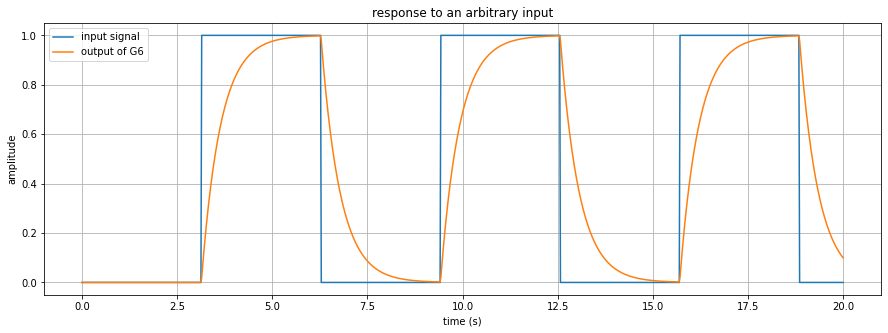

In [16]:
t = np.linspace(0, 20, 1000)                # time is taken from 0s to 10s
plt.figure(figsize=(15, 5))                 # to make a long figure

x = np.array(np.sin(t) < 0, dtype='float')  # let us create a square pulse
plt.plot(t, x, label='input signal')        # and plot it

G6 = co.tf([2], [1, 2])                     # define the system G6
# calculate the response of G6 when the input is the square pulse input x
_, y, _ = co.forced_response(G6, t, x)

plt.plot(t, y, label='output of G6')        # plot the output
plt.xlabel('time (s)')                      # labels
plt.ylabel('amplitude')                     # labels
plt.title('response to an arbitrary input') # title
plt.legend()                                # legend for each of the plots
plt.grid()                                  # grid     

**Exercise 5**

Find the step response of $G_7 = \dfrac{5}{s+5}$ when excited with a sine wave $x(t) = \sin(t)$. Write your code in the cell provided below.

In [17]:
# Write your code here